# Packages and constants <a class="anchor" id="packages-constants"></a>

In [22]:
# Install packages
!pip install tellurium -q

# Import packages
import tellurium as te # Python-based modeling environment for kinetic models


# Demo

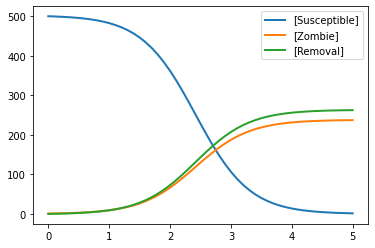

In [23]:
r = te.loads("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000882.7?filename=munz2000.xml")
r.simulate()
r.plot()


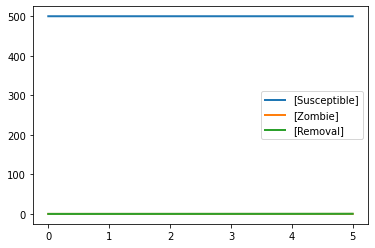

In [30]:
r = te.loads("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000882.7?filename=munz2000.xml")
r.Zombie = 0
r.simulate()
r.plot()


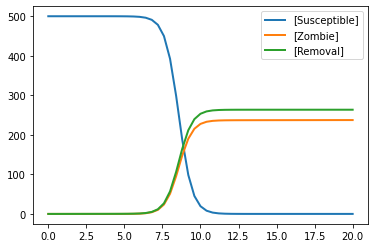

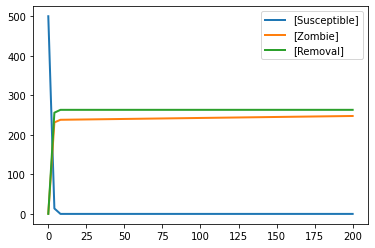

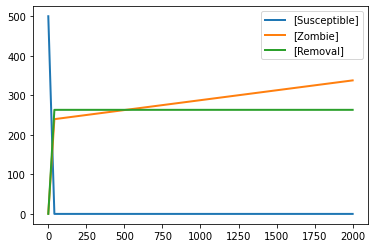

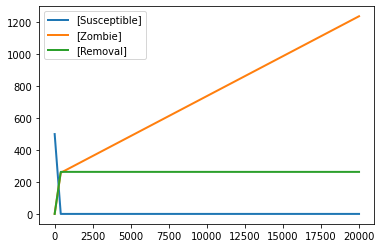

In [35]:
r = te.loads("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000882.7?filename=munz2000.xml")
r.Zombie = 0
r.simulate(0, 20)
r.plot()
r.reset()

r.simulate(0, 200)
r.plot()
r.reset()

r.simulate(0, 2000)
r.plot()
r.reset()

r.simulate(0, 20000)
r.plot()
r.reset()



In [24]:
print(r.getAntimony())

// Created by libAntimony v2.12.0
function Function_for_Removal_of_zombie_or_susceptible(beta, Susceptible, Zombie, delta)
  beta*Susceptible*Zombie + delta*Susceptible;
end

Function_for_Removal_of_zombie_or_susceptible is "Function for Removal of zombie or susceptible"

function Function_for_resurrection_to_Zombie(zeta, Removal)
  zeta*Removal;
end

Function_for_resurrection_to_Zombie is "Function for resurrection to Zombie"

function Function_for_Susceptible_to_Zombie_or_death(beta, Susceptible, Zombie, delta)
  beta*Susceptible*Zombie + delta*Susceptible;
end

Function_for_Susceptible_to_Zombie_or_death is "Function for Susceptible to Zombie or death"

function Function_for_Death_from_Zombie(alpha, Susceptible, Zombie)
  alpha*Susceptible*Zombie;
end

Function_for_Death_from_Zombie is "Function for Death from Zombie"

function Function_for_Zombification(beta, Susceptible, Zombie, zeta, Removal)
  beta*Susceptible*Zombie + zeta*Removal;
end

Function_for_Zombification is "Function f

In [25]:
import libsbml
sbmldoc = libsbml.readSBMLFromString(r.getSBML())
props = libsbml.ConversionProperties()
props.addOption("expandFunctionDefinitions", True)
if sbmldoc.convert(props) != libsbml.LIBSBML_OPERATION_SUCCESS:
        print("[Error] Conversion failed...")
        sys.exit(1)

newsbml = libsbml.writeSBMLToString(sbmldoc)
r = te.loads(newsbml)
print(r.getAntimony())

// Created by libAntimony v2.12.0
model *New_Model()

  // Compartments and Species:
  compartment compartment_;
  species Susceptible in compartment_, Zombie in compartment_, Removal in compartment_;

  // Reactions:
  Birth:  => Susceptible; compartment_*p;
  Zombification:  => Zombie; compartment_*(beta*Susceptible*Zombie + zeta*Removal);
  Susceptible_to_Zombie_or_death: Susceptible => ; compartment_*(beta*Susceptible*Zombie + delta*Susceptible);
  Removal_of_zombie_or_susceptible:  => Removal; compartment_*(alpha*Susceptible*Zombie + delta*Susceptible);
  Resurrection_to_Zombie: Removal => ; compartment_*zeta*Removal;
  Death_from_Zombie: Zombie => ; compartment_*alpha*Susceptible*Zombie;

  // Species initializations:
  Susceptible = 500;
  Zombie = 1;
  Removal = 0;

  // Compartment initializations:
  compartment_ = 1;

  // Variable initializations:
  alpha = 0.005;
  beta = 0.0095;
  delta = 0.0001;
  zeta = 0.0001;
  p = 0.05;

  // Other declarations:
  const compartment_, 

In [26]:
newsbml

'<?xml version="1.0" encoding="UTF-8"?>\n<sbml xmlns="http://www.sbml.org/sbml/level2/version4" level="2" version="4">\n  <model metaid="COPASI0" id="New_Model" name="Munz2009 - Zombie SIZRC">\n    <notes>\n      <body xmlns="http://www.w3.org/1999/xhtml">\n        <pre>Munz2009 - Zombie SIZRC \nThis is the model with an latent infection and cure for zombies described in the article. \nThis model was originally created by libAntimony v1.4 (using libSBML 3.4.1). \nThis model is described in the article: \nWhen zombies attack!: Mathematical modelling of an outbreak of zombie infection \nP. Munz, I. Hudea, J. Imad and R.J. Smith? \nInfectious Disease Modelling Research Progress 2009, chapter 4, pp 133-150. Editors: Jean Michel Tchuenche and C. Chiyaka; Nova Science Publishers, Inc., NY, USA. \nAbstract: \nZombies are a popular figure in pop culture/entertainment and they are usually portrayed as being brought about through an outbreak or epidemic. Consequently, we model a zombie attack, u

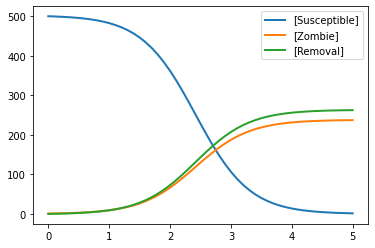

In [27]:
antstr = """
model *New_Model()

  // Compartments and Species:
  compartment compartment_;
  species Susceptible in compartment_, Zombie in compartment_, Removal in compartment_;

  // Reactions:
  Birth:  => Susceptible; compartment_*p;
  Zombification:  => Zombie; compartment_*(beta*Susceptible*Zombie + zeta*Removal);
  Susceptible_to_Zombie_or_death: Susceptible => ; compartment_*(beta*Susceptible*Zombie + delta*Susceptible);
  Removal_of_zombie_or_susceptible:  => Removal; compartment_*(alpha*Susceptible*Zombie + delta*Susceptible);
  Resurrection_to_Zombie: Removal => ; compartment_*zeta*Removal;
  Death_from_Zombie: Zombie => ; compartment_*alpha*Susceptible*Zombie;

  // Species initializations:
  Susceptible = 500;
  Zombie = 1;
  Removal = 0;

  // Compartment initializations:
  compartment_ = 1;

  // Variable initializations:
  alpha = 0.005;
  beta = 0.0095;
  delta = 0.0001;
  zeta = 0.0001;
  p = 0.05;

  // Other declarations:
  const compartment_, alpha, beta, delta, zeta, p;

  // Unit definitions:
  unit volume = 1e-3 litre;
  unit time_unit = 86400 second;
  unit substance = 1e-3 mole;

  // Display Names:
  time_unit is "time";
  Susceptible_to_Zombie_or_death is "Susceptible to Zombie or death";
  Removal_of_zombie_or_susceptible is "Removal of zombie or susceptible";
  Resurrection_to_Zombie is "Resurrection to Zombie";
  Death_from_Zombie is "Death from Zombie";

  // CV terms:
  Susceptible instance "http://identifiers.org/ncit/C16505"
  Removal instance "http://identifiers.org/ncit/C64914"
  Birth property "http://identifiers.org/ncit/C25155"
  Susceptible_to_Zombie_or_death property "http://identifiers.org/ncit/C16505"
  Removal_of_zombie_or_susceptible property "http://identifiers.org/ncit/C64914"
  Resurrection_to_Zombie property "http://identifiers.org/ncit/C37987"
  Death_from_Zombie instance "http://identifiers.org/go/GO:0016265"
end
"""
r = te.loada(antstr)
r.simulate()
r.plot()

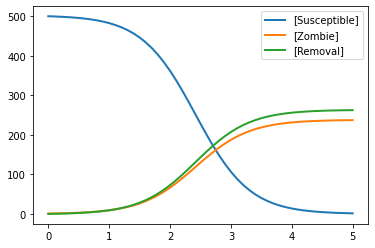

In [28]:
antstr = """
model *New_Model()

  // Reactions:
  Birth:  => Susceptible; p;
  Zombification:  => Zombie;(beta*Susceptible*Zombie + zeta*Removal);
  Susceptible_to_Zombie_or_death: Susceptible => ; (beta*Susceptible*Zombie + delta*Susceptible);
  Removal_of_zombie_or_susceptible:  => Removal; (alpha*Susceptible*Zombie + delta*Susceptible);
  Resurrection_to_Zombie: Removal => ; zeta*Removal;
  Death_from_Zombie: Zombie => ; alpha*Susceptible*Zombie;

  // Species initializations:
  Susceptible = 500;
  Zombie = 1;
  Removal = 0;

  // Compartment initializations:
  compartment_ = 1;

  // Variable initializations:
  alpha = 0.005;
  beta = 0.0095;
  delta = 0.0001;
  zeta = 0.0001;
  p = 0.05;

  // Other declarations:
  const compartment_, alpha, beta, delta, zeta, p;

  // Unit definitions:
  unit volume = 1e-3 litre;
  unit time_unit = 86400 second;
  unit substance = 1e-3 mole;

  // Display Names:
  time_unit is "time";
  Susceptible_to_Zombie_or_death is "Susceptible to Zombie or death";
  Removal_of_zombie_or_susceptible is "Removal of zombie or susceptible";
  Resurrection_to_Zombie is "Resurrection to Zombie";
  Death_from_Zombie is "Death from Zombie";

  // CV terms:
  Susceptible instance "http://identifiers.org/ncit/C16505"
  Removal instance "http://identifiers.org/ncit/C64914"
  Birth property "http://identifiers.org/ncit/C25155"
  Susceptible_to_Zombie_or_death property "http://identifiers.org/ncit/C16505"
  Removal_of_zombie_or_susceptible property "http://identifiers.org/ncit/C64914"
  Resurrection_to_Zombie property "http://identifiers.org/ncit/C37987"
  Death_from_Zombie instance "http://identifiers.org/go/GO:0016265"
end
"""
r = te.loada(antstr)
r.simulate()
r.plot()

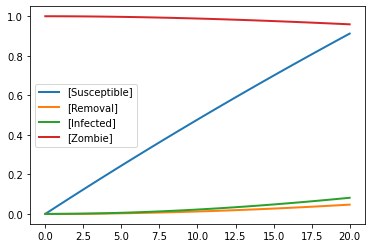

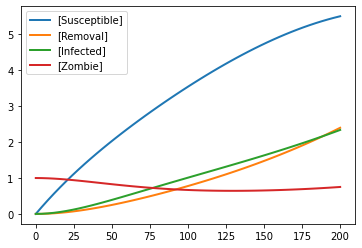

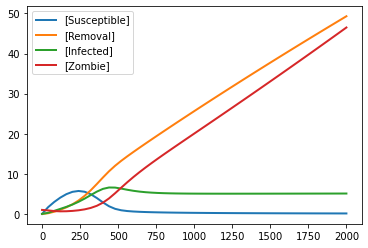

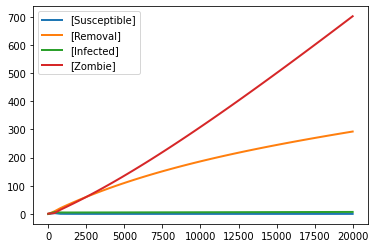

In [38]:
antstr = """
model *New_Model()

  // Reactions:
  //Birth:  => Susceptible; p;
  //Zombification:  => Zombie;(beta*Susceptible*Zombie + zeta*Removal);
  //Susceptible_to_Zombie_or_death: Susceptible => ; (beta*Susceptible*Zombie + delta*Susceptible);
  //Removal_of_zombie_or_susceptible:  => Removal; (alpha*Susceptible*Zombie + delta*Susceptible);
  //Resurrection_to_Zombie: Removal => ; zeta*Removal;
  //Death_from_Zombie: Zombie => ; alpha*Susceptible*Zombie;

  Birth:                         => Susceptible; p
  Death:             Susceptible => Removal;     delta*Susceptible
  Infection:         Susceptible => Infected;    beta*Susceptible*Zombie
  Zombification:      Infected   => Zombie;      rho*Infected
  Inf_death:          Infected   => Removal;     delta * Infected
  Zombie_death_and_res: Zombie   => Removal;     alpha * Susceptible * Zombie - zeta * Removal
  Cure:                 Zombie   => Susceptible; cure * Zombie

  // Species initializations:
  Susceptible = 0;
  Zombie = 1;
  Removal = 0;
  Infected = 0;

  // Compartment initializations:
  compartment_ = 1;

  // Variable initializations:
  alpha = 0.005;
  beta = 0.0095;
  delta = 0.0001;
  zeta = 0.0001;
  rho = 0.01
  p = 0.05;
  cure = 0.00003

  // Other declarations:
  const compartment_, alpha, beta, delta, zeta, p;

  // Unit definitions:
  unit volume = 1e-3 litre;
  unit time_unit = 86400 second;
  unit substance = 1e-3 mole;
end
"""
r = te.loada(antstr)
r.simulate(0, 20)
r.plot()

r.reset()
r.simulate(0, 200)
r.plot()

r.reset()
r.simulate(0, 2000)
r.plot()

r.reset()
r.simulate(0, 20000)
r.plot()


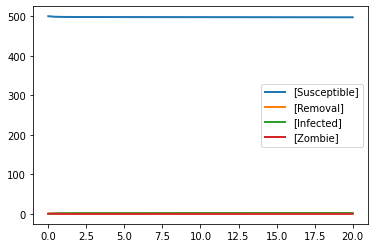

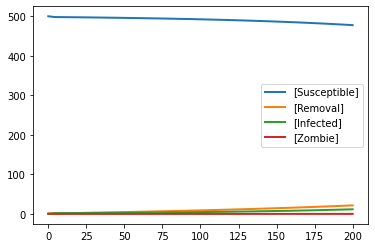

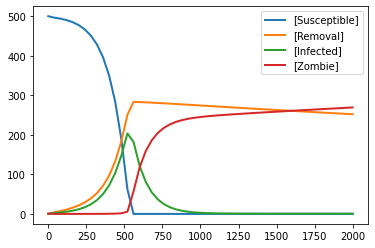

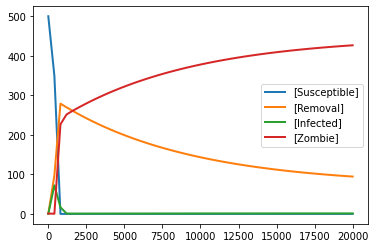

In [40]:
antstr = """
model *New_Model()

  // Reactions:
  //Birth:  => Susceptible; p;
  //Zombification:  => Zombie;(beta*Susceptible*Zombie + zeta*Removal);
  //Susceptible_to_Zombie_or_death: Susceptible => ; (beta*Susceptible*Zombie + delta*Susceptible);
  //Removal_of_zombie_or_susceptible:  => Removal; (alpha*Susceptible*Zombie + delta*Susceptible);
  //Resurrection_to_Zombie: Removal => ; zeta*Removal;
  //Death_from_Zombie: Zombie => ; alpha*Susceptible*Zombie;

  Birth:                         => Susceptible; p*Susceptible/500
  Death:             Susceptible => Removal;     delta*Susceptible
  Infection:         Susceptible => Infected;    beta*Susceptible*Zombie
  Zombification:      Infected   => Zombie;      rho*Infected
  Inf_death:          Infected   => Removal;     delta * Infected
  Zombie_death_and_res: Zombie   => Removal;     alpha * Susceptible * Zombie - zeta * Removal
  Cure:                 Zombie   => Susceptible; cure * Zombie

  // Species initializations:
  Susceptible = 500;
  Zombie = 1;
  Removal = 0;
  Infected = 0;

  // Compartment initializations:
  compartment_ = 1;

  // Variable initializations:
  alpha = 0.005;
  beta = 0.0095;
  delta = 0.0001;
  zeta = 0.0001;
  rho = 0.01
  p = 0.05;
  cure = 0.00003

  // Other declarations:
  const compartment_, alpha, beta, delta, zeta, p;

  // Unit definitions:
  unit volume = 1e-3 litre;
  unit time_unit = 86400 second;
  unit substance = 1e-3 mole;
end
"""
r = te.loada(antstr)
r.simulate(0, 20)
r.plot()

r.reset()
r.simulate(0, 200)
r.plot()

r.reset()
r.simulate(0, 2000)
r.plot()

r.reset()
r.simulate(0, 20000)
r.plot()
